## 3. Modeling TF-IDF x Random Forest

### 3.1 Importing the Libraries 

In [1]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [2]:
DATA_DIR = "../dataset/processed/02_after_FE_raw"
MODEL_SAVE_PATH = "../models/rf_model_raw.pkl" 

### 3.2 Load the Dataset

In [3]:
X_train_tfidf = pickle.load(open(os.path.join(DATA_DIR, "X_train_tfidf.pkl"), "rb"))
y_train       = pickle.load(open(os.path.join(DATA_DIR, "y_train.pkl"), "rb"))

X_test_tfidf  = pickle.load(open(os.path.join(DATA_DIR, "X_test_tfidf.pkl"), "rb"))
y_test        = pickle.load(open(os.path.join(DATA_DIR, "y_test.pkl"), "rb"))

### 3.3 Konversi Data Type

In [4]:
y_train = np.array(y_train, dtype=int).ravel()
y_test = np.array(y_test, dtype=int).ravel()

### 3.3 Check Array Dimension

In [5]:
print(f"Shape X_train_tfidf: {X_train_tfidf.shape}")
print(f"Shape y_train: {y_train.shape}")

Shape X_train_tfidf: (30806, 5000)
Shape y_train: (30806,)


### 3.4 Build Random Forest Model with TF-IDF

In [6]:
model_rf = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    n_jobs=-1,
    verbose=1,
    class_weight='balanced',
    max_depth=20,
    min_samples_leaf=5 
)

### 3.5 Training

In [7]:
model_rf.fit(X_train_tfidf, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 22 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.0s finished


,n_estimators,100
,criterion,'gini'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 3.6 Evaluation

In [8]:
y_pred = model_rf.predict(X_test_tfidf)
acc = accuracy_score(y_test, y_pred)

print(f"\nAkurasi Test (Random Forest + TF-IDF): {acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Non-Hoax', 'Hoax']))


Akurasi Test (Random Forest + TF-IDF): 0.9780

Classification Report:
              precision    recall  f1-score   support

    Non-Hoax       0.99      0.98      0.99      1926
        Hoax       0.83      0.90      0.86       163

    accuracy                           0.98      2089
   macro avg       0.91      0.94      0.93      2089
weighted avg       0.98      0.98      0.98      2089



[Parallel(n_jobs=22)]: Using backend ThreadingBackend with 22 concurrent workers.
[Parallel(n_jobs=22)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=22)]: Done 100 out of 100 | elapsed:    0.1s finished


In [9]:
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec  = recall_score(y_test, y_pred, zero_division=0)
f1   = f1_score(y_test, y_pred, zero_division=0)

print("\n" + "="*40)
print("   DETAIL EVALUASI: Random Forest + TF-IDF")
print("="*40)
print(f"Akurasi   : {acc:.4f}")
print(f"Presisi   : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1-Score  : {f1:.4f}")
print("="*40)


   DETAIL EVALUASI: Random Forest + TF-IDF
Akurasi   : 0.9780
Presisi   : 0.8305
Recall    : 0.9018
F1-Score  : 0.8647


#### 3.6.1 Confusion Matrix

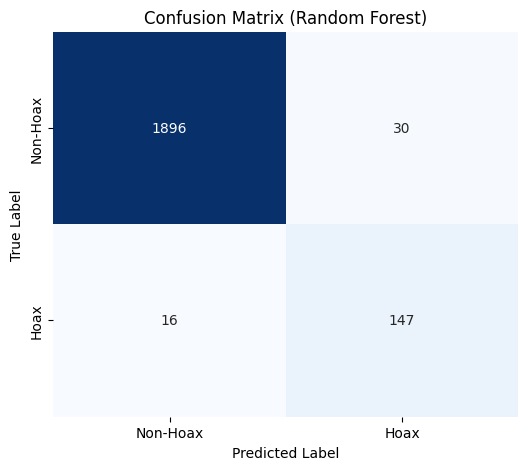

In [10]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Hoax', 'Hoax'], 
            yticklabels=['Non-Hoax', 'Hoax'])

plt.title('Confusion Matrix (Random Forest)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### 3.7 Save Model

In [11]:
os.makedirs("../models", exist_ok=True) 

with open(MODEL_SAVE_PATH, 'wb') as f:
    pickle.dump(model_rf, f)

print(f"Model RF saved to: {MODEL_SAVE_PATH}")

Model RF saved to: ../models/rf_model_raw.pkl
